# Lab 1 — Spectral Analysis of Deterministic Signals
## Variant 11

**Task:** Synthesize a discrete-time signal using the IDFT in matrix notation.

Given DFT spectrum vector (Variant 11):
$$\mathbf{x}_\mu = [6, 2, 4, 3, 4, 5, 0, 0, 0, 0]^T$$

The block length is $N = 10$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

## 1. Define the DFT Spectrum Vector and Block Length

In [2]:
# DFT coefficient vector for Variant 11
X_mu = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0, 0], dtype=complex)

N = len(X_mu)
print(f'Block length N = {N}')
print(f'DFT spectrum vector x_mu = {X_mu}')

Block length N = 10
DFT spectrum vector x_mu = [6.+0.j 2.+0.j 4.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## 2. Build the Matrix K and Fourier Matrix W

The outer product matrix $\mathbf{K}$ contains all products $k \cdot \mu$:
$$K = \begin{pmatrix}0\\1\\\vdots\\N-1\end{pmatrix} \cdot \begin{pmatrix}0 & 1 & \cdots & N-1\end{pmatrix}$$

The Fourier matrix is:
$$W = e^{+j\frac{2\pi}{N}} \odot K$$

In [3]:
# Index vectors
k = np.arange(N)   # sample indices
mu = np.arange(N)  # frequency indices

# Outer product matrix K
K = np.outer(k, mu)

print('Matrix K:')
print(K)

Matrix K:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


In [4]:
# Twiddle factor
W_N = np.exp(+1j * 2 * np.pi / N)

# Fourier matrix W (element-wise power)
W = W_N ** K

print('Fourier matrix W (real part):')
print(np.round(W.real, 4))
print('\nFourier matrix W (imaginary part):')
print(np.round(W.imag, 4))

Fourier matrix W (real part):
[[ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309  0.309  0.809]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809 -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809 -0.809 -0.309]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309  0.309 -0.809]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309  0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809 -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809 -0.809  0.309]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309  0.309  0.809]]

Fourier matrix W (imaginary part):
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.5878  0.9511  0.9511  0.5878  0.     -0.5878 -0.9511 -0.9511
  -0.5878]
 [ 0.      0.9511  0.5878 -0.5878 -0.

## 3. Visualize the Fourier Matrix

Plot the real and imaginary parts of W as heatmaps.

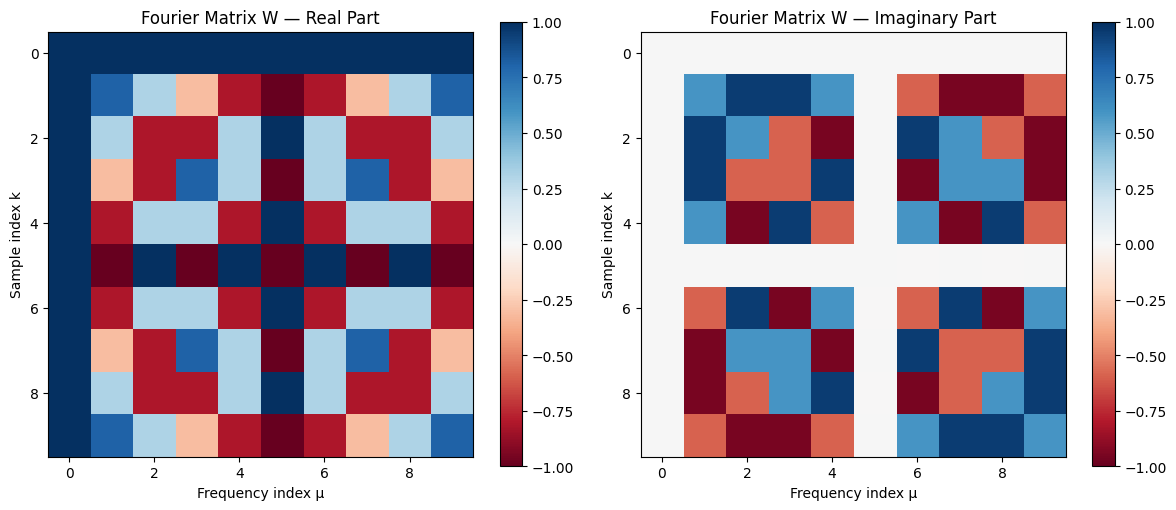

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im0 = axes[0].imshow(W.real, cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_title('Fourier Matrix W — Real Part')
axes[0].set_xlabel('Frequency index μ')
axes[0].set_ylabel('Sample index k')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(W.imag, cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_title('Fourier Matrix W — Imaginary Part')
axes[1].set_xlabel('Frequency index μ')
axes[1].set_ylabel('Sample index k')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

## 4. Verify Fourier Matrix Properties

Key property: $W^{-1} = \frac{W^H}{N} = \frac{W^*}{N}$ (since W is symmetric).

We verify that $\frac{1}{N} W \cdot W^* = I$.

In [6]:
# Check: (1/N) * W * W^* should equal identity matrix
identity_check = (1/N) * W @ np.conj(W)
print('(1/N) * W * W* (should be identity):')
print(np.round(identity_check.real, 6))
print('\nMax deviation from identity:', np.max(np.abs(identity_check - np.eye(N))))

(1/N) * W * W* (should be identity):
[[ 1. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.  1. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  1. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.  1.]]

Max deviation from identity: 3.99680965064895e-15


## 5. IDFT via Matrix Multiplication (Signal Synthesis)

The IDFT in matrix notation:
$$\mathbf{x}_k = \frac{1}{N} W \cdot \mathbf{x}_\mu$$

In [7]:
# IDFT via matrix multiplication
x_k = (1/N) * W @ X_mu

print('Synthesized signal x[k] (via matrix IDFT):')
for i, val in enumerate(x_k):
    print(f'  x[{i}] = {val.real:.6f} + j*{val.imag:.6f}')

Synthesized signal x[k] (via matrix IDFT):
  x[0] = 2.400000 + j*0.000000
  x[1] = -0.030902 + j*1.018411
  x[2] = 0.719098 + j*-0.131433
  x[3] = 0.080902 + j*0.159184
  x[4] = 0.830902 + j*-0.212663
  x[5] = 0.400000 + j*0.000000
  x[6] = 0.830902 + j*0.212663
  x[7] = 0.080902 + j*-0.159184
  x[8] = 0.719098 + j*0.131433
  x[9] = -0.030902 + j*-1.018411


## 6. Verify with numpy.fft.ifft

In [8]:
# Verification using numpy's ifft
x_k_numpy = ifft(X_mu)

print('Verification with numpy ifft:')
print('Max difference between matrix IDFT and numpy ifft:', 
      np.max(np.abs(x_k - x_k_numpy)))
print('\nResults match:', np.allclose(x_k, x_k_numpy))

Verification with numpy ifft:
Max difference between matrix IDFT and numpy ifft: 2.1790364205204197e-15

Results match: True


## 7. Verify Round-Trip: DFT of Synthesized Signal

DFT in matrix notation:
$$\mathbf{x}_\mu = W^* \cdot \mathbf{x}_k$$

In [9]:
# DFT via matrix multiplication
X_mu_recovered = np.conj(W) @ x_k

print('Original X_mu:   ', X_mu)
print('Recovered X_mu:  ', np.round(X_mu_recovered, 6))
print('Round-trip OK:', np.allclose(X_mu, X_mu_recovered))

Original X_mu:    [6.+0.j 2.+0.j 4.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Recovered X_mu:   [ 6.-0.j  2.-0.j  4.-0.j  3.-0.j  4.-0.j  5.+0.j -0.+0.j -0.+0.j -0.-0.j
 -0.-0.j]
Round-trip OK: True


## 8. Plot the Synthesized Signal

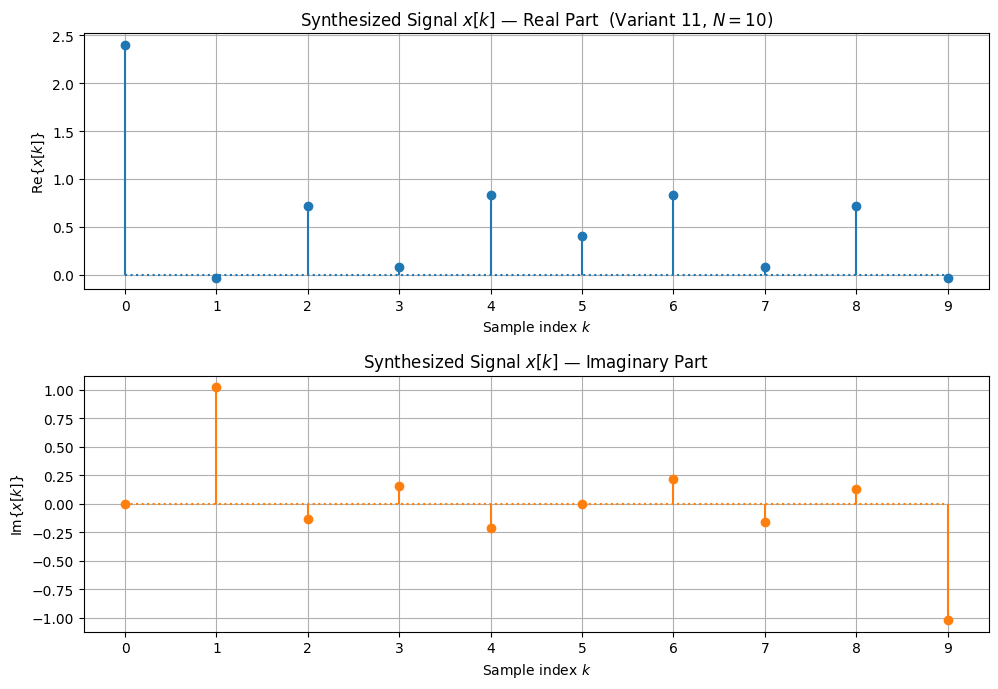

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

# Real part
axes[0].stem(k, x_k.real, markerfmt='C0o', basefmt='C0:', linefmt='C0-')
axes[0].set_title(r'Synthesized Signal $x[k]$ — Real Part  (Variant 11, $N=10$)')
axes[0].set_xlabel(r'Sample index $k$')
axes[0].set_ylabel(r'$\mathrm{Re}\{x[k]\}$')
axes[0].set_xticks(k)
axes[0].grid(True)

# Imaginary part
axes[1].stem(k, x_k.imag, markerfmt='C1o', basefmt='C1:', linefmt='C1-')
axes[1].set_title(r'Synthesized Signal $x[k]$ — Imaginary Part')
axes[1].set_xlabel(r'Sample index $k$')
axes[1].set_ylabel(r'$\mathrm{Im}\{x[k]\}$')
axes[1].set_xticks(k)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 9. Plot the DFT Spectrum

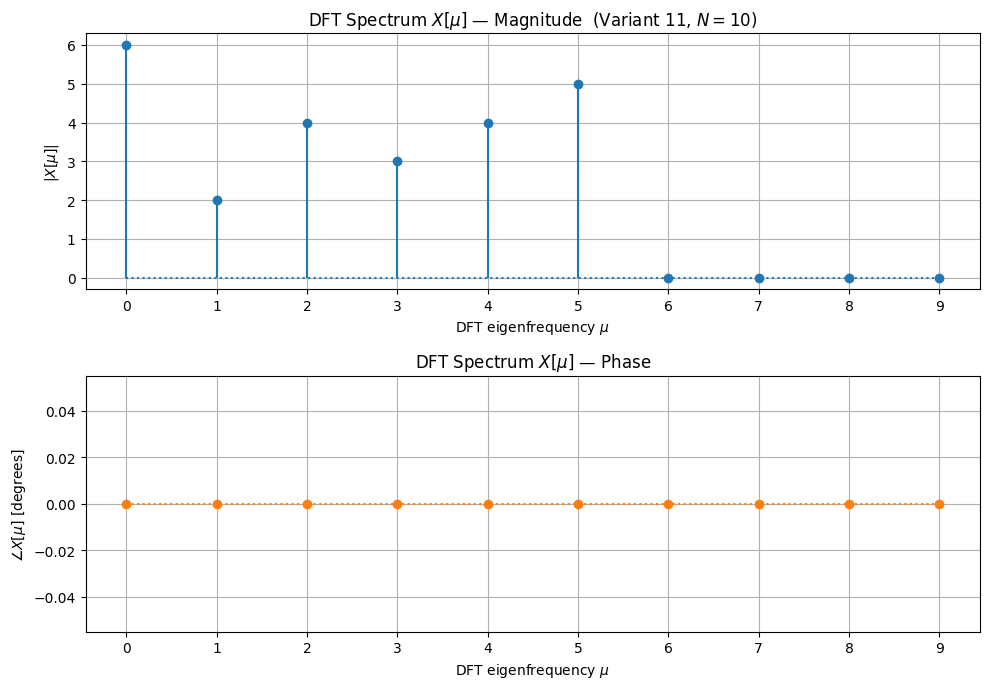

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

# Magnitude spectrum
axes[0].stem(mu, np.abs(X_mu), markerfmt='C0o', basefmt='C0:', linefmt='C0-')
axes[0].set_title(r'DFT Spectrum $X[\mu]$ — Magnitude  (Variant 11, $N=10$)')
axes[0].set_xlabel(r'DFT eigenfrequency $\mu$')
axes[0].set_ylabel(r'$|X[\mu]|$')
axes[0].set_xticks(mu)
axes[0].grid(True)

# Phase spectrum
axes[1].stem(mu, np.angle(X_mu, deg=True), markerfmt='C1o', basefmt='C1:', linefmt='C1-')
axes[1].set_title(r'DFT Spectrum $X[\mu]$ — Phase')
axes[1].set_xlabel(r'DFT eigenfrequency $\mu$')
axes[1].set_ylabel(r'$\angle X[\mu]$ [degrees]')
axes[1].set_xticks(mu)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 10. DFT Eigensignals (Columns of W)

The columns of W are the DFT eigensignals:
$$w_\mu[k] = \cos\left(\frac{2\pi}{N}k\mu\right) + j\sin\left(\frac{2\pi}{N}k\mu\right)$$

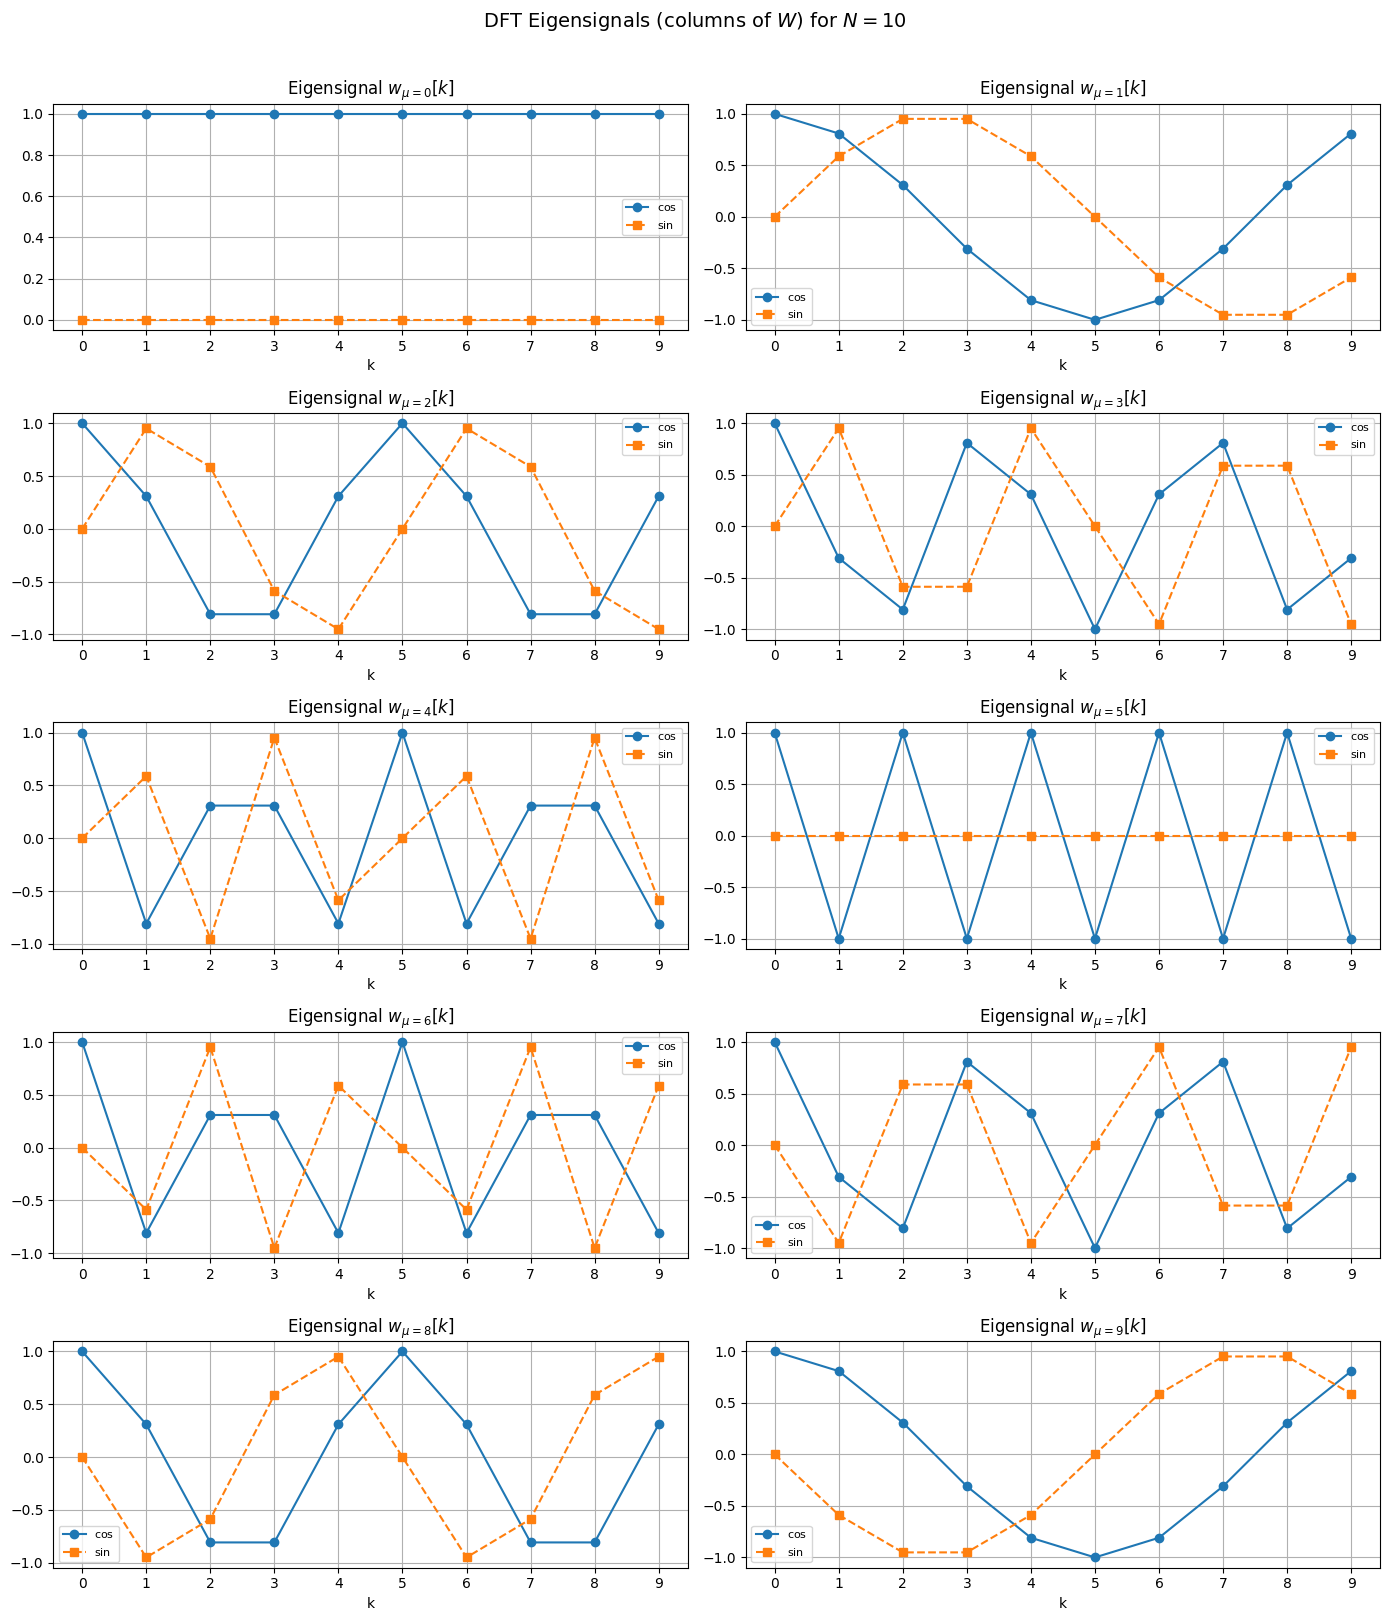

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

for mu_idx in range(N):
    col = W[:, mu_idx]  # mu-th column of W
    axes[mu_idx].plot(k, col.real, 'C0o-', label=r'$\cos$')
    axes[mu_idx].plot(k, col.imag, 'C1s--', label=r'$\sin$')
    axes[mu_idx].set_title(rf'Eigensignal $w_{{\mu={mu_idx}}}[k]$')
    axes[mu_idx].set_xlabel('k')
    axes[mu_idx].set_xticks(k)
    axes[mu_idx].legend(fontsize=8)
    axes[mu_idx].grid(True)

plt.suptitle(r'DFT Eigensignals (columns of $W$) for $N=10$', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## Summary

For **Variant 11** with $N = 10$ and:
$$\mathbf{x}_\mu = [6, 2, 4, 3, 4, 5, 0, 0, 0, 0]^T$$

We have:
- Built the $10 \times 10$ Fourier matrix $W$ using the outer product $K$ and the twiddle factor $W_N = e^{+j2\pi/N}$.
- Synthesized the time-domain signal via the IDFT matrix formula: $\mathbf{x}_k = \frac{1}{N} W \cdot \mathbf{x}_\mu$.
- Verified the result matches `numpy.fft.ifft()`.
- Verified the round-trip (DFT of synthesized signal recovers the original $\mathbf{x}_\mu$).
- The signal is **complex-valued** since $\mathbf{x}_\mu$ is not conjugate-symmetric.